<a href="https://colab.research.google.com/github/SAIKAT12345678910/Flight-Fare-Intelligence-Price-Prediction-System/blob/main/airlines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/practice set/airlines_flights_data.csv')
df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


#EDA

In [ ]:
df.drop(columns='index', inplace=True)

In [ ]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
df.shape

(300153, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [ ]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [ ]:
df.isna().sum()

,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0
days_left,0


In [ ]:
def preice_group(price):
  if price<=20000:
    return "low (<=20k)"
  elif price<=60000:
    return "medium (20k-60k)"
  else:
    return "high (>60k)"
df['price_group']=df['price'].apply(preice_group)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,price_group
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,low (<=20k)
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,low (<=20k)
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,low (<=20k)
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,low (<=20k)
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,low (<=20k)


In [ ]:
df['route']= df['source_city'].astype(str)+'-'+df['destination_city'].astype(str)
df # airline route

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,price_group,route
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,low (<=20k),Delhi-Mumbai
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,low (<=20k),Delhi-Mumbai
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,low (<=20k),Delhi-Mumbai
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,low (<=20k),Delhi-Mumbai
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,low (<=20k),Delhi-Mumbai
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265,high (>60k),Chennai-Hyderabad
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105,high (>60k),Chennai-Hyderabad
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,high (>60k),Chennai-Hyderabad
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585,high (>60k),Chennai-Hyderabad


In [ ]:
d=df[df['price_group']=='low (<=20k)']
pivot=d.pivot_table(index='route', values='price', aggfunc=['mean', 'count'])
pivot.columns=['mean_price', 'count_route']
pivot.sort_values(by='mean_price', ascending=True)# low Flight route

,mean_price,count_route
route,,
Mumbai-Delhi,5718.724660,9708
Chennai-Hyderabad,5823.948744,3980
Hyderabad-Chennai,5892.828516,4117
Delhi-Mumbai,5916.507122,9899
Delhi-Hyderabad,5919.168807,6540
Delhi-Chennai,5962.662020,7604
Chennai-Delhi,5986.274566,7022
Hyderabad-Delhi,5995.035392,5990
Bangalore-Delhi,6029.936894,9904


In [ ]:
m=df[df['price_group']=='high (>60k)']
pivot=m.pivot_table(index='route', values='price', aggfunc=['mean', 'count'])
pivot.columns=['mean_price', 'count_route']
pivot.sort_values(by='mean_price', ascending=False)# expensive route of flight

,mean_price,count_route
route,,
Kolkata-Hyderabad,75920.541114,377
Hyderabad-Chennai,73739.619835,242
Chennai-Hyderabad,72685.717579,347
Chennai-Kolkata,72205.256098,328
Kolkata-Delhi,70597.305915,1082
Delhi-Kolkata,70165.519444,1440
Mumbai-Bangalore,70025.224531,1973
Bangalore-Mumbai,69880.483919,2021
Hyderabad-Kolkata,69722.196970,396


#There are no fixed price pattern for any single route,this happens beacause ticket price depends on class,durations,airline etc

In [ ]:
df.groupby('departure_time')['price'].mean().sort_values(ascending=True)

,price
departure_time,
Late_Night,9295.299387
Afternoon,18179.203331
Early_Morning,20370.676718
Evening,21232.361894
Morning,21630.760254
Night,23062.146808


###late_night are chepest time to book flight

In [ ]:
df.groupby('arrival_time')['price'].mean().sort_values(ascending=True)

,price
arrival_time,
Late_Night,11284.906078
Early_Morning,14993.139521
Afternoon,18494.598993
Night,21586.758341
Morning,22231.076098
Evening,23044.371615


#For arrival time late night, early morning,and afternoon are chepest

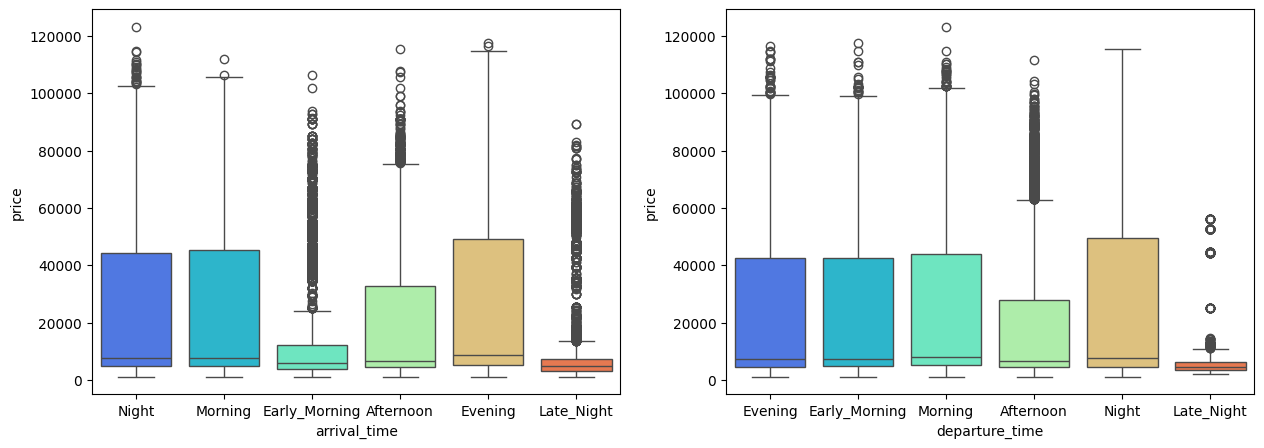

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x='arrival_time', y='price', data=df,hue='arrival_time', palette='rainbow')
plt.subplot(1,2,2)
sns.boxplot(x='departure_time', y='price', data=df,hue='departure_time', palette='rainbow')
plt.show()

# Arrival_time
Night,morning & Evening arrival show the highest ticket price,also there are some outliers means there are business class ticket. Late_night and Early_morning shows the lowest ticket price and also there are many outliers it can be there are some business class or last-minute ticket are sold at higher price.

# Departure_time
Evening, Early morning, Morning departures are the most expensive may be demand are high and also there are some business class so there are some outliers.  for Night, prices are high and stable may be passengers want to journy over-night and for Late night the prices are chepest but there are some outliers not so much maybe for business class

In [ ]:
df.head(1)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,price_group,route
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,low (<=20k),Delhi-Mumbai


In [ ]:
pivot_table=df.pivot_table(index='airline',
                           columns='route',
                           values='flight',
                           aggfunc='count',
                           fill_value=0)
print('pivot_table(route wise flights count):')
print(pivot_table) # count of flights by airline and route

pivot_table(route wise flights count):
route      Bangalore-Chennai  Bangalore-Delhi  Bangalore-Hyderabad  \
airline                                                              
AirAsia                  138             1558                  192   
Air_India               1610             2633                 2228   
GO_FIRST                 369             1446                  473   
Indigo                   282             1961                 1318   
SpiceJet                  58              735                   31   
Vistara                 3953             5423                 4686   

route      Bangalore-Kolkata  Bangalore-Mumbai  Chennai-Bangalore  \
airline                                                             
AirAsia                  848               628                138   
Air_India               2026              3555               1638   
GO_FIRST                 873              1337                382   
Indigo                  1637              1882         

 # Vistara airline dominates every single route listed.

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64


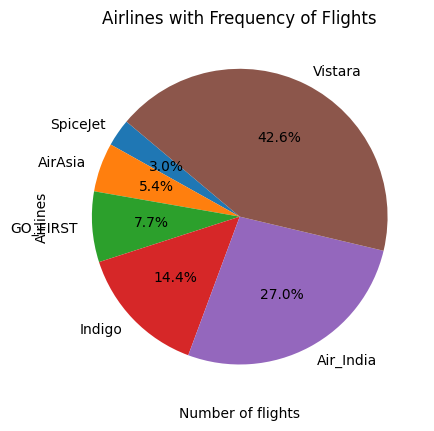

In [ ]:
airline_count=df['airline'].value_counts(ascending=False) # showing all the airlines with their number of flihts
print(airline_count)

df['airline'].value_counts(ascending=True).plot.pie(color=['yellow', 'orange'],autopct='%1.1f%%', startangle=140)
plt.title('Airlines with Frequency of Flights')
plt.ylabel('Airlines')
plt.xlabel('Number of flights')
plt.show()

# Airlines with Frequency of Flights.- Vistara then Air India, then Indigo

In [ ]:
df[df['duration']<=15.000000].value_counts().sum() ## total those flight whose have min duration

np.int64(210494)

In [ ]:
df[df['price_group']=='low (<=20k)'].value_counts().sum() ## those flight whose price is <=20k(lowest price)

np.int64(205349)

In [ ]:
price_route=df.groupby(['route','airline'])['price'].min().unstack()
cheapest= price_route.idxmin(axis=1)
cheapest

,0
route,
Bangalore-Chennai,AirAsia
Bangalore-Delhi,AirAsia
Bangalore-Hyderabad,Indigo
Bangalore-Kolkata,Indigo
Bangalore-Mumbai,Vistara
Chennai-Bangalore,AirAsia
Chennai-Delhi,Indigo
Chennai-Hyderabad,AirAsia
Chennai-Kolkata,AirAsia


# AirAsia are generally cheaper on max routes, but there are some flight that are even cheaper than Air Asia on some route.

In [ ]:
df.groupby('airline')['price'].mean().sort_values(ascending=True)

,price
airline,
AirAsia,4091.072742
Indigo,5324.216303
GO_FIRST,5652.007595
SpiceJet,6179.278881
Air_India,23507.019112
Vistara,30396.536302


# Top 3 Cheapest flight - AirAsia then Indigo then GO_FIRST and Expensive flight - Vistara then Air India

In [ ]:
df.groupby('airline')['duration'].mean().sort_values(ascending=True)

,duration
airline,
Indigo,5.795197
GO_FIRST,8.755380
AirAsia,8.941714
SpiceJet,12.579767
Vistara,13.326634
Air_India,15.504235


# Indigo,GO_FIRST, and AirAsia offers faster flights

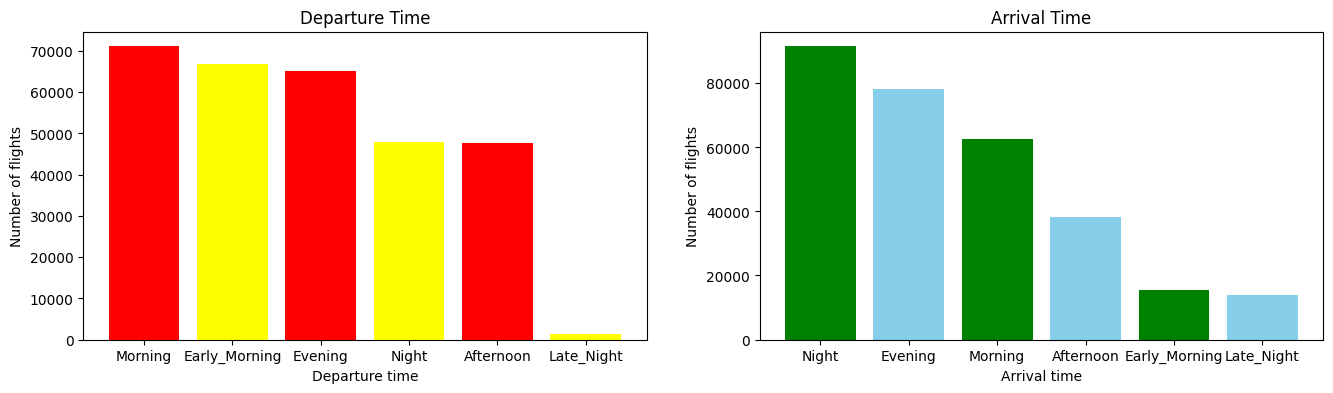

In [ ]:
# showing the departture time and arrival time for the flight with their counts
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.bar(df['departure_time'].value_counts().index, df['departure_time'].value_counts().values, color=['red','yellow'])
plt.title('Departure Time')
plt.xlabel('Departure time')
plt.ylabel('Number of flights')
plt.subplot(1,2,2)
plt.bar(df['arrival_time'].value_counts().index,df['arrival_time'].value_counts().values, color=['green', 'skyblue'])
plt.title('Arrival Time')
plt.xlabel('Arrival time')
plt.ylabel('Number of flights')
plt.show()

#Most flights depart in the early morning, morning, and evening.
#After afternoon, the number of departing flights starts to decrease, and late-night departures are very few.
#On the other hand, for arrival time, the highest number of flights arrive at night, and then the count gradually decreases. It means passengers prefer morning departure and night arrivals.

In [ ]:
# Find most popular departure time
most_common_departure = df['departure_time'].value_counts().idxmax()
most_common_departure_count = df['departure_time'].value_counts().max()

# Find most popular arrival time
most_common_arrival = df['arrival_time'].value_counts().idxmax()
most_common_arrival_count = df['arrival_time'].value_counts().max()

#avg price
avg_price_departure = df[df['departure_time'] == most_common_departure]['price'].mean()
avg_price_arrival = df[df['arrival_time'] == most_common_arrival]['price'].mean()

print(f"Most popular departure_time: {most_common_departure}, and flights: {most_common_departure_count}, and and Average price: {avg_price_departure}")
print(f"Most popular arrival_time: {most_common_arrival}, and flights: {most_common_arrival_count},and Average price: {avg_price_arrival} ")

Most popular departure_time: Morning, and flights: 71146, and and Average price: 21630.760253563094
Most popular arrival_time: Night, and flights: 91538,and Average price: 21586.75834079836 


## most flight are scheduled to departure time in morning and evening while arrival are highest during night and evening and for avg_price of departure_time is 21630.76 and of arrival_time is 21586.76

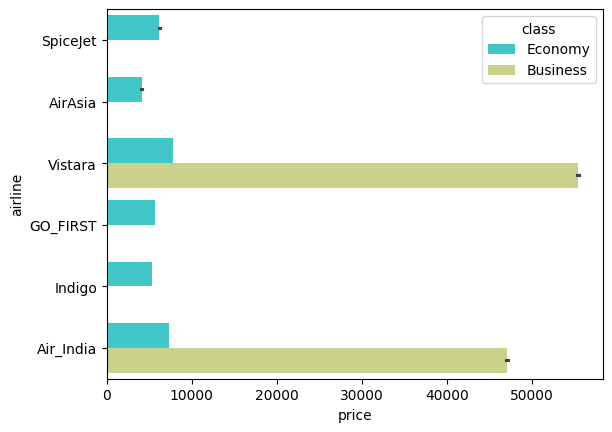

In [ ]:
sns.barplot(x='price',y='airline', data=df, palette='rainbow', hue='class')
plt.show()

## economic class price are low across all flight and business class price are high specially vistara and air india

In [ ]:
df.groupby('days_left')['price'].mean()

,price
days_left,
1,21591.867151
2,30211.299801
3,28976.083569
4,25730.905653
5,26679.773368
6,24856.493902
7,25588.367351
8,24895.883995
9,25726.246072


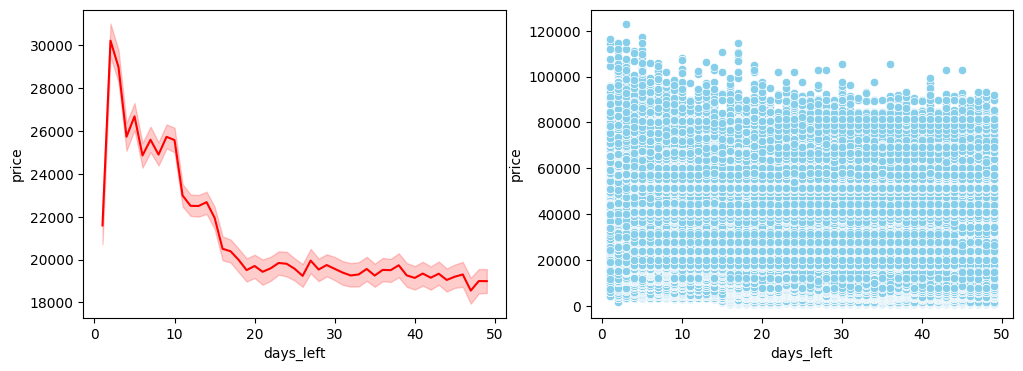

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.lineplot(x='days_left', y='price', data=df, color='red')
plt.subplot(1,2,2)
sns.scatterplot(x='days_left', y='price', data=df, color='skyblue')
plt.show()

## There is a huge defferent in the price of the ticket based on the days_left, ticket price are less when many days are left and when fewer day are left, the ticket price become high.

In [ ]:
df.groupby('stops')['price'].mean().sort_values(ascending=True)

,price
stops,
zero,9375.938535
two_or_more,14113.450775
one,22900.992482


#When stop is zero then price also low

In [ ]:
df.head(1)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,price_group,route
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,low (<=20k),Delhi-Mumbai


In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt

for airline in df['airline'].unique():
    airline_df = df[df['airline'] == airline]
    plot = px.scatter(airline_df, x='duration', y='price',title=f'Duration vs Price for {airline}')

    plot.show()



# Duration does not have a strong correlation with ticket price, means longer flight time does not alawas mean higher ticket price. some short flights are expensive, and some long flights are cheap

In [ ]:
import statsmodels.formula.api as smf
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
df.rename(columns={'class':'travel_class'}, inplace=True)

In [ ]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'travel_class', 'duration',
       'days_left', 'price', 'price_group', 'route'],
      dtype='object')

In [ ]:
model=smf.ols("price~days_left+duration+C(stops)+C(travel_class)+C(airline)", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                 2.945e+05
Date:                Thu, 01 Jan 2026   Prob (F-statistic):               0.00
Time:                        04:35:49   Log-Likelihood:            -3.0792e+06
No. Observations:              300153   AIC:                         6.158e+06
Df Residuals:                  300142   BIC:                         6.158e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

#all p-values are statistically significant
- When the number of stops is two or more, the ticket price increases by about 2554.8166 compared to a one-stop flight.
- When the number of stops is zero (non-stop flight), the ticket price decreases by about 7837.50 compared to a one-stop flight.
- If the ticket is Economy class, the price is about 44990 lower than Business class.
- If the airline is Air_india,the price is about 152.38 higher than Air_Asia
- If the airline is GO_FIRST,the price is about 1747.70 higher than Air_asia
- If the airline is Indigo, the price is about 2375.98 higher than Air_asia
- If the airline is Spicejet, the price is about 2728.02 higher than Air_asia
- If the airline is Vistara, the price is about 4179.32 higher than Air_asia

- For every one-unit increase in days left before travel, the ticket price decreases by about 131.79.
- For every one-unit increase in flight duration, the ticket price increases by about 54.14.

#Predict price

In [ ]:
x=df.drop(columns='price')
y=df['price']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train_encoded = pd.get_dummies(x_train,  drop_first=True)
x_test_encoded = pd.get_dummies(x_test,  drop_first=True)

In [ ]:
x_train_encoded, x_test_encoded = x_train_encoded.align(x_test_encoded, join='left', axis=1, fill_value=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # there  are huge different each variable measured in different rang.
X_train_scaled = scaler.fit_transform(x_train_encoded)
X_test_scaled = scaler.transform(x_test_encoded)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test_scaled)

In [ ]:
# MAPE
y_pred = model.predict(X_test_scaled)
mape = np.mean(np.abs((y_test - y_pred)/y_test)) * 100
print("MAPE:", mape)

MAPE: 36.408850617802166


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled,y_train)


DecisionTreeRegressor(random_state=42)

In [ ]:
pred=dt.predict(X_test_scaled)

In [ ]:
mape=np.mean(np.abs((y_test-y_pred)/y_test))*100
print(mape)

36.408850617802166


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(X_train_scaled,y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred=rf.predict(X_test_scaled)

In [ ]:
mape=np.mean(np.abs((y_test-y_pred)/y_test))*100
print(round(mape,2))

4.86


#mean absolute error is 4.86, and the best model is random forest